In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df= pd.read_csv('possum.csv')
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [39]:
df['age_group']=pd.cut(df['age'],bins=[0,2,4,6,10],labels=['young','mid','adult','old'])
df=df.drop('age',axis=1)
df.head()

,case,site,Pop,sex,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,age_group
0,1,1,Vic,m,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0,old
1,2,1,Vic,f,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0,adult
2,3,1,Vic,f,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0,adult
3,4,1,Vic,f,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0,adult
4,5,1,Vic,f,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0,young


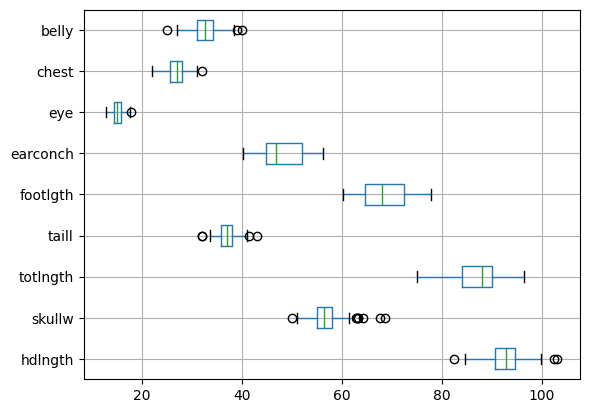

In [40]:
x=df.drop(['age_group','case','Pop','site','sex'],axis=1)
y=df['age_group']
from scipy.stats.mstats import winsorize

for i in x.columns:
    df[i]=winsorize(df[i],limits=[0.07,0.07])

x.select_dtypes(include="number").boxplot(vert=False)
plt.show()


In [43]:
from sklearn.preprocessing import StandardScaler

scale=StandardScaler()
scaled=scale.fit_transform(x)
df1= pd.DataFrame(scaled,columns=x.columns)
df=pd.concat([df1,y],axis=1)
df.head()

,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,age_group
0,0.420996,1.134883,0.445603,-0.517732,1.381091,1.557431,0.147177,0.491222,1.241874,old
1,-0.028932,0.231197,1.028384,-0.261331,0.923835,0.750501,0.912499,0.736833,0.150424,adult
2,0.392875,1.005785,1.960834,1.020671,1.586856,0.921668,0.434173,1.473667,0.514241,adult
3,0.167912,0.069825,1.144941,0.507870,1.746896,0.995025,0.147177,0.491222,0.514241,adult
4,-0.310136,-0.188371,-0.370290,-0.517732,0.580893,1.239549,0.051512,0.736833,0.150424,young


In [52]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='most_frequent')
imp2 =SimpleImputer(strategy='mean')

df['age_group'] = imp.fit_transform(df[['age_group']]).ravel()
df['footlgth'] = imp2.fit_transform(df[['footlgth']])


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression

x=df.drop('age_group',axis=1)
y=df['age_group']

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)


logr=LogisticRegression(max_iter=5000)
logr.fit(X_train,y_train)



LogisticRegression(max_iter=5000)

In [58]:
y_pred=logr.predict(X_test)
print(confusion_matrix(y_pred,y_test))
print("accuracy_score: ",accuracy_score(y_pred,y_test))
print("classification_report:\n",classification_report(y_pred,y_test))

[[2 4 0 0]
 [2 6 1 1]
 [0 1 0 1]
 [0 1 0 2]]
accuracy_score:  0.47619047619047616
classification_report:
               precision    recall  f1-score   support

       adult       0.50      0.33      0.40         6
         mid       0.50      0.60      0.55        10
         old       0.00      0.00      0.00         2
       young       0.50      0.67      0.57         3

    accuracy                           0.48        21
   macro avg       0.38      0.40      0.38        21
weighted avg       0.45      0.48      0.46        21

